# Requirment
Contributor: Pat Wu, Ethan Wu


In [1]:
import sys
print(sys.version)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


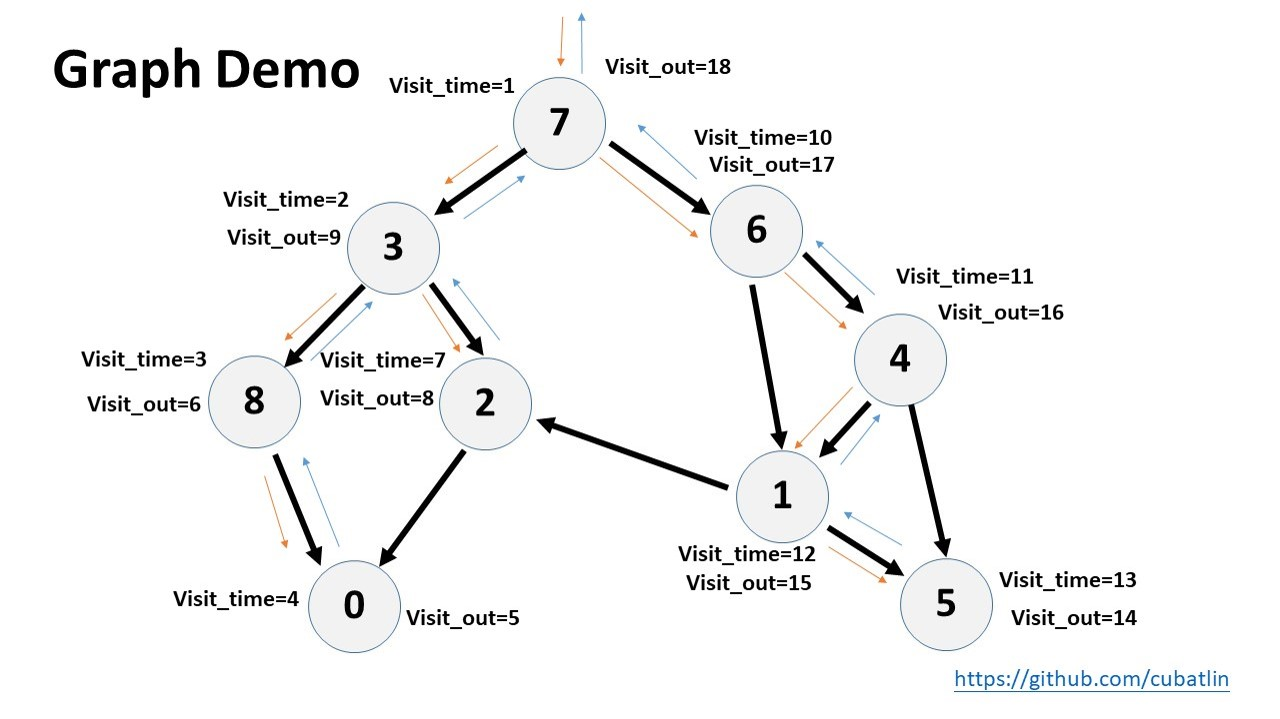

In [2]:
from IPython.display import Image
Image("Graph.jpg")

# Graph pipeline
* 1.先檢查網路中是否有環, 把環內成員用代表號代替
* 2.用代表號拉圖 (Adjency List … )
* 3.尋找代表號圖中的 Dominator
* 4.Dominator [i] & Dominator [j]中間所包含的所有成員, 就是一個戶

In [3]:
%reset -f
import pandas as pd
import numpy as np

c1 = [7,7,7,3,3,8,2,6,6,4,4,1,1]
c2 = [3,6,4,8,2,0,0,4,1,1,5,5,2]

data_array = np.vstack((c1,c2)).T
del c1 ,c2

Adj_List = [[] for i in  range(data_array.max()+1)]#無向圖  
Adj_DList = [[] for i in  range(data_array.max()+1)]#有向圖
Adj_RDList = [[] for i in  range(data_array.max()+1)]#反向圖

#Prepare Graph data
for i,j in data_array:
    Adj_List[i].append(j)
    Adj_List[j].append(i)
    Adj_DList[i].append(j)
    Adj_RDList[j].append(i)

In [4]:
#CheckPoint: 看一下SCC的contract是否正確
for i,x in enumerate(Adj_List):
    print('Member: ',i,' / 指向&被指向: ',x)

Member:  0  / 指向&被指向:  [8, 2]
Member:  1  / 指向&被指向:  [6, 4, 5, 2]
Member:  2  / 指向&被指向:  [3, 0, 1]
Member:  3  / 指向&被指向:  [7, 8, 2]
Member:  4  / 指向&被指向:  [7, 6, 1, 5]
Member:  5  / 指向&被指向:  [4, 1]
Member:  6  / 指向&被指向:  [7, 4, 1]
Member:  7  / 指向&被指向:  [3, 6, 4]
Member:  8  / 指向&被指向:  [3, 0]


In [5]:
#CheckPoint: 看一下SCC的contract是否正確
for i,x in enumerate(Adj_DList):
    print('Member: ',i,' / 指向: ',x)

Member:  0  / 指向:  []
Member:  1  / 指向:  [5, 2]
Member:  2  / 指向:  [0]
Member:  3  / 指向:  [8, 2]
Member:  4  / 指向:  [1, 5]
Member:  5  / 指向:  []
Member:  6  / 指向:  [4, 1]
Member:  7  / 指向:  [3, 6, 4]
Member:  8  / 指向:  [0]


In [6]:
#CheckPoint: 看一下SCC的contract是否正確
for i,x in enumerate(Adj_RDList):
    print('Member: ',i,' / 被指向: ',x)

Member:  0  / 被指向:  [8, 2]
Member:  1  / 被指向:  [6, 4]
Member:  2  / 被指向:  [3, 1]
Member:  3  / 被指向:  [7]
Member:  4  / 被指向:  [7, 6]
Member:  5  / 被指向:  [4, 1]
Member:  6  / 被指向:  [7]
Member:  7  / 被指向:  []
Member:  8  / 被指向:  [3]


----
### SCC- 1 

In [7]:
#Initial
t=0
top=0
visit=np.zeros(data_array.max()+1,'i4')
visit_point=np.zeros(data_array.max()+1,'i4')

instack=np.zeros(data_array.max()+1,'i4')  #是否在堆裡
low=np.zeros(data_array.max()+1,'i4')      #i的代表號最小的遍歷時間(tmp)
contract=np.zeros(data_array.max()+1,'i4') #儲存代表號的array
stack=np.zeros(data_array.max()+1,'i4')    #存堆

def DFS_list_SCC(i,Adj_Dlist):
    if (visit[i]!=0):return;
    global t ; global top
    visit_point[t]=i
    t+=1
    visit[i] = low[i] =t
    
    #堆一次就+1
    stack[top] = i; instack[i] = True
    print('stack:[top]',i)
    top+=1
  
    for j in Adj_Dlist[i]:
        if visit[j]==0:
            DFS_list_SCC(j,Adj_Dlist)
        #如果j有在堆裡,把i的最低low改成i,j中最小的
        #Hint:如果成環, 必會指回環的開頭
        #把成員的low[i]改成組長的,
        #這樣成員就不會在if (visit[i] == low[i]):這段去尋找強連通 
        if instack[j]==True: 
            low[i] = min(low[i], low[j])
            print('instack cond',i)
            print('Now low[i]:',low[i],' (time)')
            print('----------')
    
    #當visit[i]跟low[i]一樣,把i當頭,尋找i以下的強連通        
    if (visit[i] == low[i]): 
        print('if (visit[i] == low[i]) COND','i:',i,'/visit[i]:',visit[i])
        j=0
        #把在堆裡的從最後往後拔 (Stack)
        while True:
            print("Now top:",top)
            top-=1
            print("Now top-1:",top)
            print("Now stack:",stack)
            j = stack[top]
            instack[j] = False
            contract[j] = i
            if i==j:
                print('---------')
                break

In [8]:
#遍歷所有點,把成環的圈在一起
for i in np.unique(data_array):
    if visit[i]==0: #如果i沒被遍歷過,就找他的SCC(更新contract) 
        DFS_list_SCC(i,Adj_DList);

stack:[top] 0
if (visit[i] == low[i]) COND i: 0 /visit[i]: 1
Now top: 1
Now top-1: 0
Now stack: [0 0 0 0 0 0 0 0 0]
---------
stack:[top] 1
stack:[top] 5
if (visit[i] == low[i]) COND i: 5 /visit[i]: 3
Now top: 2
Now top-1: 1
Now stack: [1 5 0 0 0 0 0 0 0]
---------
stack:[top] 2
if (visit[i] == low[i]) COND i: 2 /visit[i]: 4
Now top: 2
Now top-1: 1
Now stack: [1 2 0 0 0 0 0 0 0]
---------
if (visit[i] == low[i]) COND i: 1 /visit[i]: 2
Now top: 1
Now top-1: 0
Now stack: [1 2 0 0 0 0 0 0 0]
---------
stack:[top] 3
stack:[top] 8
if (visit[i] == low[i]) COND i: 8 /visit[i]: 6
Now top: 2
Now top-1: 1
Now stack: [3 8 0 0 0 0 0 0 0]
---------
if (visit[i] == low[i]) COND i: 3 /visit[i]: 5
Now top: 1
Now top-1: 0
Now stack: [3 8 0 0 0 0 0 0 0]
---------
stack:[top] 4
if (visit[i] == low[i]) COND i: 4 /visit[i]: 7
Now top: 1
Now top-1: 0
Now stack: [4 8 0 0 0 0 0 0 0]
---------
stack:[top] 6
if (visit[i] == low[i]) COND i: 6 /visit[i]: 8
Now top: 1
Now top-1: 0
Now stack: [6 8 0 0 0 0 0 0 0]
--

得到contract(每個點的代表號:有成環就是用代表號代替,沒有的話就是用自己代替)

In [9]:
#CheckPoint: 看一下SCC的contract是否正確
for i,x in enumerate(contract):
    print('Member: ',i,' / Contract: ',x)

Member:  0  / Contract:  0
Member:  1  / Contract:  1
Member:  2  / Contract:  2
Member:  3  / Contract:  3
Member:  4  / Contract:  4
Member:  5  / Contract:  5
Member:  6  / Contract:  6
Member:  7  / Contract:  7
Member:  8  / Contract:  8


### SCC- 2 : 縮成團以後,把成環的成員存成 代表號:[成員] 的list格式
* 所以其實真的在做的時候, 是用代表號在拉圖, 拉完後再去map成員的list
* Input: np.unique(data_array):1D numpy.array


In [10]:
def SCC_set(Adj_Dlist,visit_member):
    Data_member_num = visit_member.max()+1
    SCC_Adj_list=[[] for i in range(Data_member_num)]
    SCC_Adj_Rlist=[[] for i in range(Data_member_num)]
    SCC=[[] for i in range(Data_member_num)]
    #用代表號拉圖
    for i in visit_member: #time complexity:O(n)
        for j in Adj_Dlist[i]: #以i當頭,看原圖指出去的點,contract是否一樣
            #如果j的代表號==i的(表示i,j為同一環)
            #此時就不紀錄在代表號圖的邊
            if contract[j]!=contract[i]:  
                SCC_Adj_list[contract[i]].append(contract[j])  #代表號出邊
                SCC_Adj_Rlist[contract[j]].append(contract[i]) #代表號入邊
    #代表號成員List(可改成Dictionary)
    for i in range(len(contract)):
       if contract[i]!=0:
           SCC[contract[i]].append(i)
    #Save
    globals()['SCC_Adj_list'] = SCC_Adj_list #代表號的Adjency list
    globals()['SCC_Adj_Rlist'] = SCC_Adj_Rlist #代表號的Adjency Reversed list
    globals()['SCC'] = SCC #代表號下的成員有誰

In [11]:
SCC_set(Adj_DList,np.unique(data_array))

這段做完後,就可以用SCC的Adj_list:SCC_Adj_list(代表號拉圖)

In [12]:
#CheckPoint: 看一下SCC後的代表號有向圖 SCC_Adj_list
#這個圖就變成有向無環圖了!
for i,x in enumerate(SCC_Adj_list):
    print('Member: ',i,' / Contract: ',x)

Member:  0  / Contract:  []
Member:  1  / Contract:  [5, 2]
Member:  2  / Contract:  [0]
Member:  3  / Contract:  [8, 2]
Member:  4  / Contract:  [1, 5]
Member:  5  / Contract:  []
Member:  6  / Contract:  [4, 1]
Member:  7  / Contract:  [3, 6, 4]
Member:  8  / Contract:  [0]


In [13]:
#CheckPoint: 比較一下SCC前的有向圖 Adj_DList
for i,x in enumerate(Adj_DList):
    print('Member: ',i,' / Contract: ',x)

Member:  0  / Contract:  []
Member:  1  / Contract:  [5, 2]
Member:  2  / Contract:  [0]
Member:  3  / Contract:  [8, 2]
Member:  4  / Contract:  [1, 5]
Member:  5  / Contract:  []
Member:  6  / Contract:  [4, 1]
Member:  7  / Contract:  [3, 6, 4]
Member:  8  / Contract:  [0]


因為這張圖沒有成環,所以SCC_Adj_list與Adj_DList一樣!

-------------
### Dominator: 找出代表號這張有向無環圖的所有支配點
* input:從沒有入邊的地方出

In [14]:
#Initial
t=0
visit=np.zeros(data_array.max()+1,'i4')         #遍歷in的時間
visit_point=np.zeros(data_array.max()+1,'i4')   #紀錄遍歷順序的array

#儲存區/ Init:自己
parent =np.zeros(data_array.max()+1,'i4')       #紀錄父節點:遍歷過程中上一層的點
p = np.zeros(data_array.max()+1,'i4')           #parent的tmp
sdom = np.zeros(data_array.max()+1,'i4')        #(tmp)入邊中能回朔到的最高點(最高的意思就是最早遍歷)->所以有可能是入邊(或是其他點的best)
best = np.zeros(data_array.max()+1,'i4')        #idom的tmp/用來存當前運算時的支配點
idom = np.zeros(data_array.max()+1,'i4')        #運算時:找i不如找idom[i](次低支配點)/最後儲存支配點的array

idom_T = np.zeros(data_array.max()+1,'i4')

for i in range(data_array.max()+1):
    parent[i] = p[i] = best[i] = sdom[i] = idom[i] = i;
revsdom=[[] for i in range(data_array.max()+1)] #組長紀錄成員的list,組長是成員入邊中所能找到的最高點

In [15]:
#Require Functions
def DFS_list(x,Adj):
    global t
    #bottom line:
    if (visit[x]!=0):return;
    
    #start
    print('Now DFS_list x: ',x)
    visit_point[t]=x
    t+=1      
    visit[x] = t
    for j in Adj[x]:
        if (visit[j]==0):
            DFS_list(j,Adj)
            parent[j] = x

def find(x):
    if (x==p[x]):
        return x
    y = find(p[x])
    #如果父節點best[p[x]]有入邊比best[x]早,
    #這樣以後找best[x]就不如找best[p[x]]好了(DP)
    if (visit[sdom[best[p[x]]]] < visit[sdom[best[x]]]):
        print('find更新:','把best[p[x]]:',best[p[x]],'->存到best[x]:',best[x])
        best[x] = best[p[x]]
    p[x] = y
    return p[x]

def DFS_list_Dominator(root,visit_member,Adj_list,Adj_Rlist):
    #尋找支配點,某點j的支配點定義為,若拔掉該支配點,則從root開始必走不到j這點
    #應用層面:拔掉支配點,家戶會破碎->支配點同時影響兩個家庭
    #Step 1:
    for k in range(t-1,0,-1):#根節點沒做
        i = visit_member[k];
        print('------------')
        print('New Stage:',i)
        #先看最早入邊有沒有比i早的,更新i的sdom
        for j in Adj_Rlist[i]:#check j指向i的有沒有更早的入邊(sdom)
            print('j:',j)
            if (visit[j]):
                find(j)
                #如果best[j]的入邊時間比i的最早入邊還早,就更新i的最早入邊呀
                if (visit[sdom[best[j]]] < visit[sdom[i]]):
                    sdom[i] = sdom[best[j]]#更新i的組長是誰
                    print('i:',i,' 更新最早入邊:',sdom[best[j]])
        revsdom[sdom[i]].append(i)#組長記錄組員;
        #在每一次i的迴圈中,會透過動態的調整best並即時確認best
        print('i入邊最早的成員有:','Lead(sdom[i]):',sdom[i],
              '/Members(revsdom[sdom[i]]):',revsdom[sdom[i]],'New In:',i)
        #把當前i當子樹頭，更新組員j們中idom
        #會有兩種情境:
        #第一種(if):如果j的best比i高,則先暫訂該j為i的idom(支配點)
        #第二種(else):如果組員j的best沒比組長i高,則該組員的idom(支配點)必是組長i
        for j in revsdom[i]:
            find(j) #透過find函數去更新best,p
            #如果組員j的best比我小,則j的支配點(idom[j])是best[j];反之就是我i
            if visit[sdom[best[j]]] < visit[i]:
                idom[j]=best[j]
            else:
                idom[j]=i
        #更新父節點
        for j in Adj_list[i]: #紀錄j的父節點p 
            if (parent[j] == i):
                p[j] = i;
    #Step 2:
    #只補做根節點=root這一個點,根節點可能是某個開頭,並不是全域最早
    for j in revsdom[root]:
        find(j)
        if visit[sdom[best[j]]] < visit[root]:
            idom[j]=best[j]
        else:
            idom[j]=root
    #Step 3:
    # 時刻從小到大，依序完成idom[best[j]]
    print('---------------------------------------','\n'
          'Step 3:時刻從小到大，依序完成idom的遞推更新')
    for k in range(t):
        i = visit_member[k];
        print('i:',i,'idom[i]:',idom[i],'sdom[i]:',sdom[i])
        if idom[i] != sdom[i]: 
            #當i的idom(次低支配點)不等於i的sdom(入邊能回朔到的最高點)
            idom[i] = idom[idom[i]] #把頭的idom一步一步往下傳給各個成員
    #Step 4:
    #歸戶需要,支配點中,出邊必須兩條以上才被認為是支配點    
    for i in list(set(idom)):
        if len(Adj_List[idom[i]])>1:
            idom_T[i]=1

def DFS_list_Dominator_initsub(visit_member):
    t=0
    for i in visit_member:
        visit[i]=0   #DFS
        parent[i] = p[i] = best[i] = sdom[i] = idom[i] = i;
        revsdom[i]=[]  #vector<int> revsdom[9];

In [16]:
# 有向無環圖所有起始點
# if len(SCC[i])>0 (找有指出去)
# and len(SCC_Adj_Rlist[i])==0 (沒有入編的當開頭)
DAG_point = [i for i in np.unique(data_array) if len(SCC[i])>0 and len(SCC_Adj_Rlist[i])==0]

In [17]:
print("有向無環圖(代表號)入邊所有起始點: ",DAG_point)

有向無環圖(代表號)入邊所有起始點:  [7]


In [18]:
for i in DAG_point:
    DFS_list(i,SCC_Adj_list) #每個開頭都做一顆子樹
    visit_member= visit_point[0:t]#記錄子樹成員
    DFS_list_Dominator(i,visit_member,SCC_Adj_list,SCC_Adj_Rlist)
    #DFS_list_Dominator_initsub(visit_member) 
    #將子樹成員的資料initial 
    #但這樣會把visit_member已經做過的再initial一次(idom可能是原本的,會被蓋掉=只留最後一次遍歷的)

Now DFS_list x:  7
Now DFS_list x:  3
Now DFS_list x:  8
Now DFS_list x:  0
Now DFS_list x:  2
Now DFS_list x:  6
Now DFS_list x:  4
Now DFS_list x:  1
Now DFS_list x:  5
------------
New Stage: 5
j: 1
i: 5  更新最早入邊: 1
j: 4
i: 5  更新最早入邊: 4
i入邊最早的成員有: Lead(sdom[i]): 4 /Members(revsdom[sdom[i]]): [5] New In: 5
------------
New Stage: 1
j: 4
i: 1  更新最早入邊: 4
j: 6
i: 1  更新最早入邊: 6
i入邊最早的成員有: Lead(sdom[i]): 6 /Members(revsdom[sdom[i]]): [1] New In: 1
------------
New Stage: 4
j: 6
i: 4  更新最早入邊: 6
j: 7
i: 4  更新最早入邊: 7
i入邊最早的成員有: Lead(sdom[i]): 7 /Members(revsdom[sdom[i]]): [4] New In: 4
find更新: 把best[p[x]]: 1 ->存到best[x]: 5
------------
New Stage: 6
j: 7
i: 6  更新最早入邊: 7
i入邊最早的成員有: Lead(sdom[i]): 7 /Members(revsdom[sdom[i]]): [4, 6] New In: 6
find更新: 把best[p[x]]: 4 ->存到best[x]: 1
------------
New Stage: 2
j: 1
i: 2  更新最早入邊: 7
j: 3
i入邊最早的成員有: Lead(sdom[i]): 7 /Members(revsdom[sdom[i]]): [4, 6, 2] New In: 2
------------
New Stage: 0
j: 2
i: 0  更新最早入邊: 7
j: 8
i入邊最早的成員有: Lead(sdom[i]): 7 /Members(re

---------------------------------------
### Recap: 現在保存的重要物件:
* DAG_point:是否是子樹開頭
* SCC:代表號下的所屬成員(包括自己)
* idom_T:是否是支配點

所以其他物件其實都可以初始化

In [19]:
print('DAG_point:是否是子樹開頭 ->',DAG_point)
print('SCC:代表號下的所屬成員(包括自己) ->',SCC)
print('idom:i的支配點是誰 ->',idom)
print('idom_T:是否是支配點 ->',idom_T)

DAG_point:是否是子樹開頭 -> [7]
SCC:代表號下的所屬成員(包括自己) -> [[], [1], [2], [3], [4], [5], [6], [7], [8]]
idom:i的支配點是誰 -> [7 7 7 7 7 7 7 7 3]
idom_T:是否是支配點 -> [0 0 0 1 0 0 0 1 0]


---------------------------------------
### 圈出所有支配點到支配點之間的成員, 形成一戶
* 從代表號中的圖,尋找是支配點的點,依次遍歷,圈出支配點到支配點之間的成員
* 預計存成list的格式

In [20]:
def DFS_list_Group(x,Adj,idom_T):
    if (visit[x]!=0):return;                        # 遍歷過的return
    
    global t
    visit_point[t]=x
    t+=1
    visit[x] = t
    
    if (idom_T[x]==1 and x!=visit_point[0]):return; # 碰到支配點return 
    
    for j in Adj[x]:
        if (visit[j]==0):
            DFS_list_Group(j,Adj,idom_T)

def DFS_list_Group_initsub(): #tmp_initial
    #call global variable
    global visit; global visit_point ;global t
    t=0
    visit=np.zeros(data_array.max()+1,'i4')         # 遍歷in的時間
    visit_point=np.zeros(data_array.max()+1,'i4')   # 紀錄遍歷順序的array

In [21]:
#Initial
Group_point = [[] for i in range(data_array.max()+1)] #放戶的成員
DFS_list_Group_initsub()

In [22]:
for i in np.where(idom_T==1)[0]:          #遍歷所有代表號支配點
    #以i當頭,放入SCC的Dlist&支配點;尋找i指出去以下成員歸併成一戶
    DFS_list_Group(i,SCC_Adj_list,idom_T) #先遍歷,放SCC所以只會做代表號
    visit_member= visit_point[0:t]        #存成員(tmp)
    Group_point[i] = list(visit_member)   #是哪組的成員
    print('代表號:',i,' /成員:',Group_point[i])
    DFS_list_Group_initsub()              #tmp初始

代表號: 3  /成員: [3, 8, 0, 2]
代表號: 7  /成員: [7, 3, 6, 4, 1, 5, 2, 0]


三種狀況:
1. 代表號: 沒成員 -> 他不是戶長也沒人
2. 代表號: 有成員但只有自己 -> 他是某環的其中一員(也是支配點)
3. 代表號: 有成員 -> 戶長也有帶人

In [23]:
#CheckPoint: 看一下SCC的contract是否正確
for i,x in enumerate(Group_point):
    print('代表號: ',i,' / 成員: ',x)

代表號:  0  / 成員:  []
代表號:  1  / 成員:  []
代表號:  2  / 成員:  []
代表號:  3  / 成員:  [3, 8, 0, 2]
代表號:  4  / 成員:  []
代表號:  5  / 成員:  []
代表號:  6  / 成員:  []
代表號:  7  / 成員:  [7, 3, 6, 4, 1, 5, 2, 0]
代表號:  8  / 成員:  []


In [24]:
#把不在代表號的成員貼進去,並flatten
for i in range(len(Group_point)):
    if Group_point[i] != []:
        print('戶長: ',i)
        print('當前成員: ',SCC[i])
        #SCC的成員沒有在Group_point,就append進去
        for j in SCC[i]:
            if j not in Group_point[i]:
                Group_point[i].append(j)
                print(i,' Group_point add:',j)
        print('---------')

戶長:  3
當前成員:  [3]
---------
戶長:  7
當前成員:  [7]
---------


In [25]:
#Flatten成BP/戶長 format
BP=[]
Head=[]
for i in range(len(Group_point)):
    if len(Group_point[i])>1:
        Group_point_len = len(Group_point[i])
        BP.extend(Group_point[i])
        Head.extend(np.repeat(i,Group_point_len))

df_out = pd.DataFrame({'BP':BP,'Head':Head})        

In [26]:
df_out

,BP,Head
0,3,3
1,8,3
2,0,3
3,2,3
4,7,7
5,3,7
6,6,7
7,4,7
8,1,7
9,5,7


感謝您耐心閱讀這份來自未來文件 :)